In [1]:
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os 
from tslearn.datasets import UCR_UEA_datasets

# Parameters

In [2]:
dataset='BasicMotions'#'GunPoint'

# Load Data

In [3]:
X_train,y_train, X_test, y_test=UCR_UEA_datasets().load_dataset(dataset)
train_x=X_train.reshape(-1,X_train.shape[-1],X_train.shape[-2])
test_x=X_test.reshape(-1,X_train.shape[-1],X_train.shape[-2])
train_y = y_train
test_y=y_test


In [4]:
enc1=pickle.load(open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','rb'))
train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

# Model Training

In [5]:
n_pred_classes =train_y.shape[1]
train_dataset = UCRDataset(train_x.astype(np.float64),train_y.astype(np.int64))
test_dataset = UCRDataset(test_x.astype(np.float64),test_y.astype(np.int64))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)
model = ResNetBaseline(in_channels=6, num_pred_classes=n_pred_classes)
fit(model,train_loader,test_loader)
if dataset in os.listdir('../../ClassificationModels/models/'):
    print('Folder exists')
else: 
    os.mkdir(f'../../ClassificationModels/models/{dataset}')
torch.save(model.state_dict(), f'../../ClassificationModels/models/{dataset}/ResNet')
model.load_state_dict(torch.load(f'../../ClassificationModels/models/{dataset}/ResNet'))
model.eval()

test_preds, ground_truth = get_all_preds(model, test_loader)
ground_truth=np.argmax(ground_truth,axis=1)

sns.set(rc={'figure.figsize':(5,4)})
heatmap=confusion_matrix(ground_truth, test_preds)
sns.heatmap(heatmap, annot=True)
plt.savefig(f'../../ClassificationModels/models/{dataset}/ResNet_confusion_matrix.png')
plt.close()
acc= accuracy_score(ground_truth, test_preds)
a = classification_report(ground_truth, test_preds, output_dict=True)
dataframe = pd.DataFrame.from_dict(a)
dataframe.to_csv(f'../../ClassificationModels/models/{dataset}/classification_report.csv', index = False)

Epoch: 1, Train loss: 1.243, Val loss: 1.228
Epoch: 2, Train loss: 1.177, Val loss: 1.023
Epoch: 3, Train loss: 0.994, Val loss: 0.9
Epoch: 4, Train loss: 0.868, Val loss: 0.868
Epoch: 5, Train loss: 0.765, Val loss: 0.677
Epoch: 6, Train loss: 0.577, Val loss: 0.449
Epoch: 7, Train loss: 0.475, Val loss: 0.329
Epoch: 8, Train loss: 0.266, Val loss: 0.114
Epoch: 9, Train loss: 0.086, Val loss: 0.133
Epoch: 10, Train loss: 0.039, Val loss: 0.049
Epoch: 11, Train loss: 0.119, Val loss: 1.019
Epoch: 12, Train loss: 0.488, Val loss: 0.347
Epoch: 13, Train loss: 0.228, Val loss: 0.083
Epoch: 14, Train loss: 0.069, Val loss: 0.136
Epoch: 15, Train loss: 0.055, Val loss: 0.24
Epoch: 16, Train loss: 0.043, Val loss: 0.083
Epoch: 17, Train loss: 0.005, Val loss: 0.037
Epoch: 18, Train loss: 0.014, Val loss: 0.015
Epoch: 19, Train loss: 0.008, Val loss: 0.008
Epoch: 20, Train loss: 0.005, Val loss: 0.007
Epoch: 21, Train loss: 0.003, Val loss: 0.01
Epoch: 22, Train loss: 0.002, Val loss: 0.014
E

# Explanation Algo

In [6]:
from TSInterpret.InterpretabilityModels.Saliency.SaliencyMethods_PTY import Saliency_PTY
int_mod=Saliency_PTY(model, train_x.shape[-1],train_x.shape[-2], method='GS',mode='feat')

2022-07-06 13:29:05.754138: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jacqueline/.local/share/virtualenvs/TSInterpret-NXJYnQDU/lib/python3.7/site-packages/cv2/../../lib64:
2022-07-06 13:29:05.754158: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
item = np.array([test_x[0,:,:]])
label = int(np.argmax(test_y[0]))


In [8]:
exp=int_mod.explain(item,labels=label,TSR = True)

In [9]:
exp

array([[0.07801111, 0.04040887, 0.04325485, 0.04266236, 0.29622299,
        0.05432108, 0.        , 0.04179663, 0.62038189, 0.03938428,
        0.13535282, 0.09590813, 0.05282327, 0.05512385, 0.58137022,
        0.93177792, 0.67327251, 0.        , 0.05077224, 0.0246431 ,
        0.59370777, 0.04184872, 0.04509271, 0.03337623, 0.05174937,
        0.04031522, 0.        , 0.03617912, 0.0506504 , 0.05752052,
        0.01623932, 0.63970631, 0.30725575, 0.05273546, 0.        ,
        0.        , 0.03801651, 0.05294087, 0.05201338, 0.05190936,
        0.54490032, 0.22510653, 0.24126967, 0.86475666, 0.        ,
        0.04457024, 0.04287236, 0.03774401, 0.0405425 , 0.02511213,
        0.05488234, 0.4030908 , 0.        , 0.49526809, 0.0525214 ,
        0.        , 0.39488674, 0.0366444 , 0.05735025, 0.24131205,
        0.05445202, 0.05022863, 0.02218779, 0.02384612, 0.42631472,
        0.04427861, 0.        , 0.32692749, 0.05505394, 0.05187925,
        0.04978266, 0.04901853, 0.59169216, 0.03

feat
NOT Time mode
-1
1
0
1
2
3
4
5


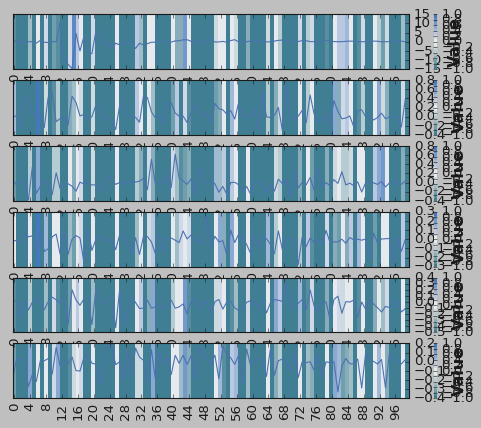

In [10]:
int_mod.plot(np.array([test_x[0,:,:]]),exp, figsize=(30,30))

feat
NOT Time mode
-1
1


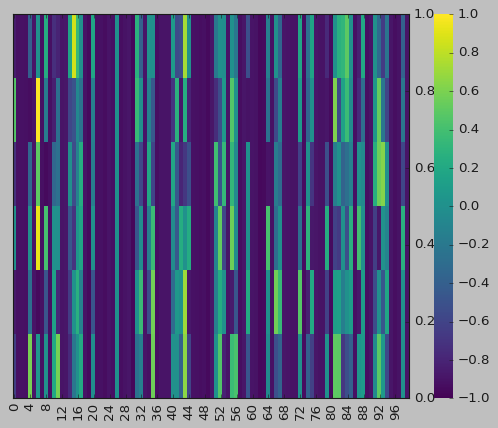

In [11]:
int_mod.plot(np.array([test_x[0,:,:]]),exp, heatmap = True)